In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
#Data Cleaning
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(8790, 10)

In [7]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

Text(0.5, 0, 'Rating')

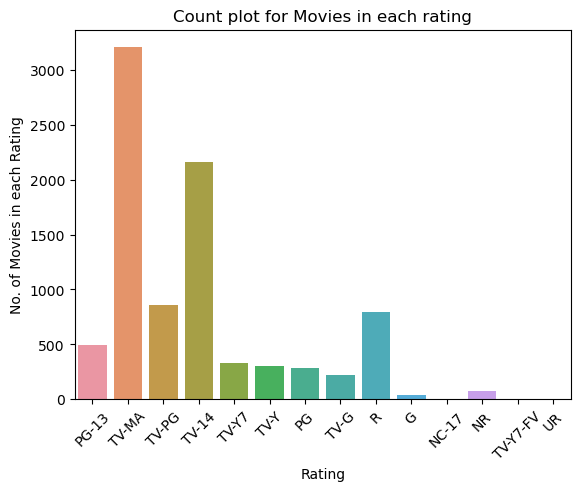

In [35]:
#Let us visualize with a count plot
fig = plt.figure()
sns.countplot(df, x='rating')
plt.title('Count plot for Movies in each rating')
plt.xticks(rotation=45)
plt.ylabel('No. of Movies in each Rating')
plt.xlabel('Rating')
    

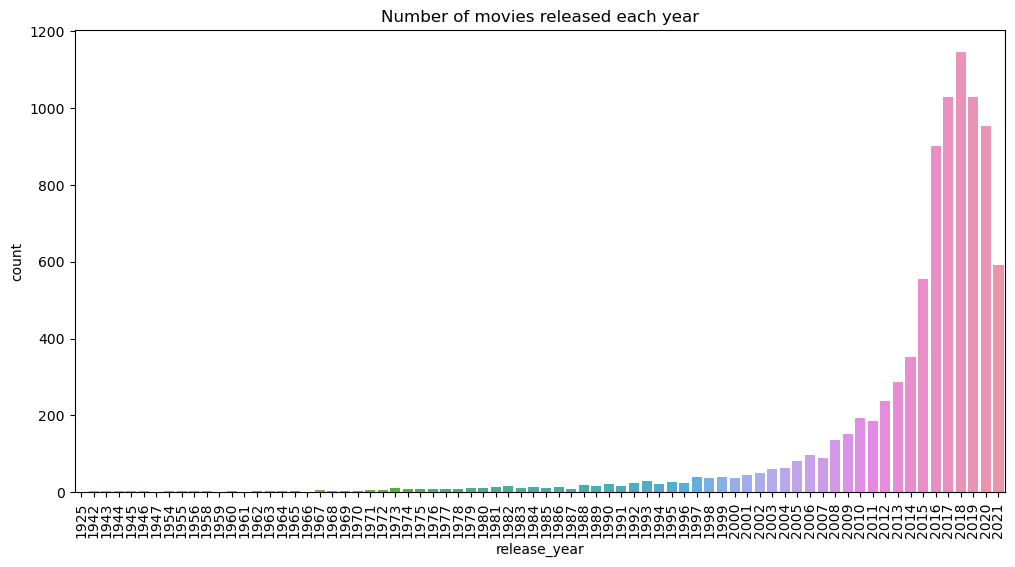

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x='release_year')
plt.xticks(rotation=90)
plt.title('Number of movies released each year')
plt.show()

In [11]:
top_directors = df['director'].value_counts().head(10)
top_directors = top_directors.drop(index = 'Not Given')

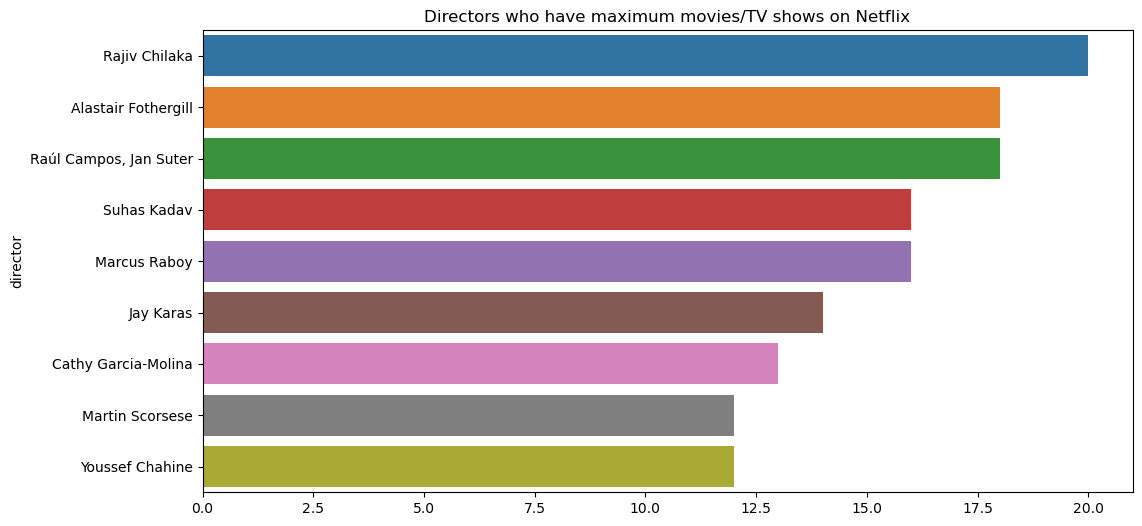

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Directors who have maximum movies/TV shows on Netflix')
plt.show()

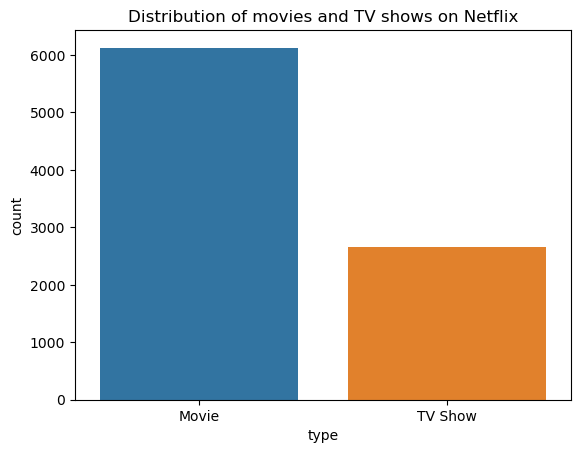

In [13]:
sns.countplot(df, x='type')
plt.title('Distribution of movies and TV shows on Netflix')
plt.show()

Text(0.5, 1.0, 'Top countries with movies on Netflix')

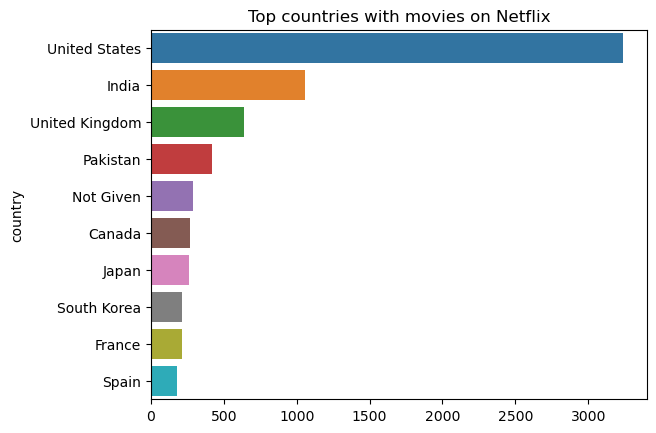

In [14]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x = top_countries.values, y = top_countries.index)
plt.title('Top countries with movies on Netflix')

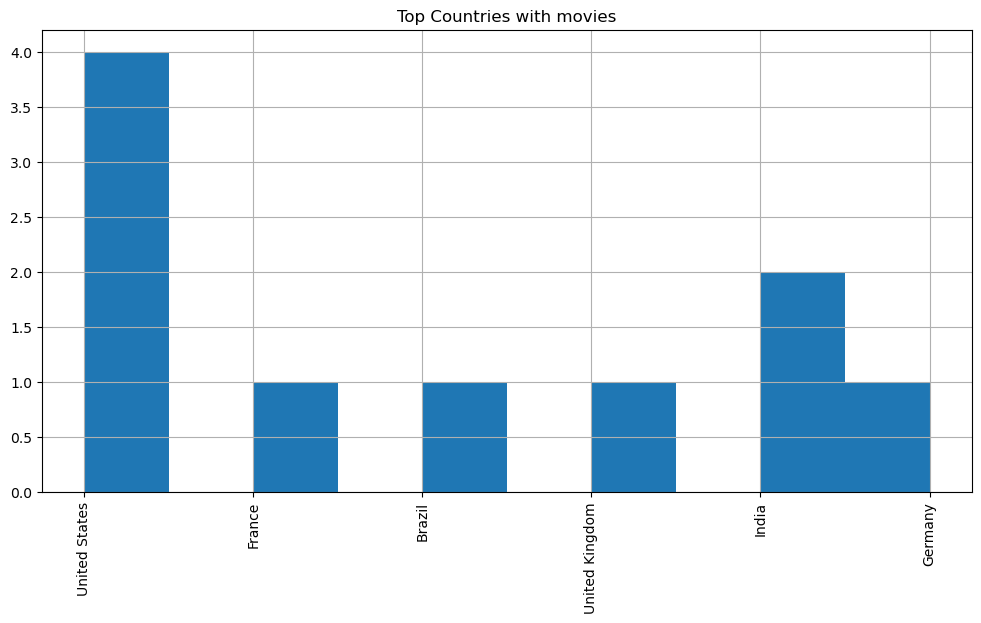

In [15]:
df['country'].head(10).hist(figsize=[12, 6])
plt.xticks(rotation=90)
plt.title('Top Countries with movies')
plt.show()

In [16]:
# Let's find recommendations based on listed_in field
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidfVec = TfidfVectorizer()

In [18]:
sparseMat = tfidfVec.fit_transform(df['listed_in'])

In [19]:
sparseMat

<8790x45 sparse matrix of type '<class 'numpy.float64'>'
	with 32221 stored elements in Compressed Sparse Row format>

In [20]:
movietoidx = pd.Series(df.index, index=df['title'])

In [21]:
movietoidx

title
Dick Johnson Is Dead                   0
Ganglands                              1
Midnight Mass                          2
Confessions of an Invisible Girl       3
Sankofa                                4
                                    ... 
Yunus Emre                          8785
Zak Storm                           8786
Zindagi Gulzar Hai                  8787
Yoko                                8788
YOM                                 8789
Length: 8790, dtype: int64

In [22]:
idx = movietoidx['Zindagi Gulzar Hai']
idx

8787

In [23]:
inArr = sparseMat[idx]
inArr.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21340041, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1867238 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33766644, 0.        , 0.        , 0.        ,
        0.54917985, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70991363, 0.        ]])

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
score = cosine_similarity(inArr, sparseMat)

In [26]:
score = score.flatten()

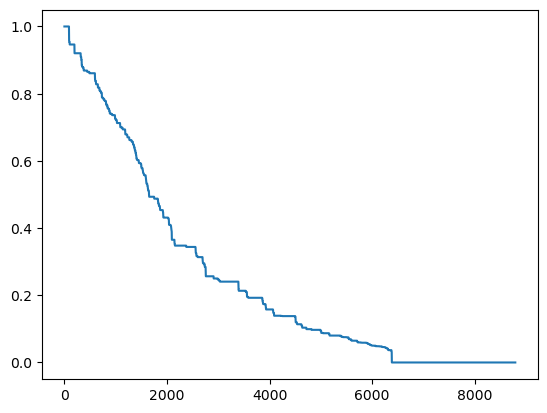

In [27]:
plt.plot(score[(-score).argsort()])

In [28]:
#Now we need top 5 scores, but the first will be self, so we will take 6
recommendedIdx = (-score).argsort()[1:6]
recommendedIdx

array([7982, 7638, 7637, 8279,  450], dtype=int64)

In [29]:
df['title'].iloc[recommendedIdx]

7982                                 Meteor Garden
7638                   Bangkok Love Stories: Plead
7637    Bangkok Love Stories: Objects of Affection
8279                               The Fierce Wife
450                                     Pretty Man
Name: title, dtype: object

In [30]:
def recommendMovie(movie_name):
    idx = movietoidx[movie_name]

    inArr = sparseMat[idx]

    score = cosine_similarity(inArr, sparseMat)

    score = score.flatten()

    recommendedIdx = (-score).argsort()[1:6]
    return df[['title', 'listed_in']].iloc[recommendedIdx]

In [31]:
print('Recommend 5 movies for Midnight Mass are \n')
print(recommendMovie('Midnight Mass'))

Recommend 5 movies for Midnight Mass are 

                           title                           listed_in
6619     Brand New Cherry Flavor  TV Dramas, TV Horror, TV Mysteries
2                  Midnight Mass  TV Dramas, TV Horror, TV Mysteries
7046   The Haunting of Bly Manor  TV Dramas, TV Horror, TV Mysteries
7076                     Ratched  TV Dramas, TV Horror, TV Mysteries
7910  The Haunting of Hill House  TV Dramas, TV Horror, TV Mysteries


In [32]:
df['title'].sample(10)

6530                         You Carry Me
1630    Carlos Almaraz: Playing with Fire
6100                          The Dreamer
922                         Taxi No. 9211
1754                    The Young Messiah
0                    Dick Johnson Is Dead
3171                              Set Off
5063                                Hisss
8618           Power Rangers Mystic Force
3876                                 Okja
Name: title, dtype: object

In [33]:
print('Recommend 5 movies for Rang De Basanti are \n')
print(recommendMovie('Rang De Basanti'))

Recommend 5 movies for Rang De Basanti are 

                           title                     listed_in
6441                 Vitti Dandu  Dramas, International Movies
3204                 Bucket List  Dramas, International Movies
3618                        Guru  Dramas, International Movies
6447                     Waiting  Dramas, International Movies
5610  Once Upon a Time in London  Dramas, International Movies


In [34]:
print('Recommend 5 movies for Motu Patlu in the Game of Zones are \n')
print(recommendMovie('Motu Patlu in the Game of Zones'))

Recommend 5 movies for Motu Patlu in the Game of Zones are 

                                   title  \
5015                           Hairspray   
2551         Luccas Neto in: Summer Camp   
2485  A Cinderella Story: Christmas Wish   
4234                   Shrek the Musical   
1066      Motu Patlu in the City of Gold   

                                              listed_in  
5015  Children & Family Movies, Comedies, Music & Mu...  
2551  Children & Family Movies, Comedies, Music & Mu...  
2485  Children & Family Movies, Comedies, Music & Mu...  
4234  Children & Family Movies, Comedies, Music & Mu...  
1066  Children & Family Movies, Comedies, Music & Mu...  
